## Bayesian Statistics

---

(start from 00:30)

Analyzing conversation rates with Bayesian Rules. This is only to solidify my understanding, so I won't be explaining any prior knowledge (e.g., frequentist, bayes rule, etc). But hope that this still help someone. 

##### Exploring Questions
1. Given certain evidence about click through rates (CTR), how can we update our beliefs about the conversion rates along the way?
2. If we have some prior knowledge about what click through rates might be, how can we incorproate that in the function?
3. Given more data in the future, how can we re-update these beliefs?
4. How can we use Bayes Rule for all of the questions above?

---

Reference: https://www.chrisstucchio.com/blog/2013/bayesian_analysis_conversion_rates.html

### Context

Let's say that on our first day, we want to send surveys to 1000 people.
Our of the 1000 surveys, only 157 users actually click on the links.
On the second day, 50 out of 500 users click the link.

We can view that whether a user click on the link is drawn from a Bernoulli Distribution with parameter &theta; .

Our goal is to best estimate &theta; that reflect the data.

#### What is wrong with a frequentist approach?

Can't we just answer that the CTR is 157/1000 = 15.7% ? 
And when more data comes, we just do this calculation again. 


E.g., On the second day, the CTr becomes (157 + 50) / (1000 + 500) = 13.8%


#### What we can't answer with the frequentist approach.

1. Certainty of this parameter: How strong do we believe that %13.8 is the value? 
2. Unable to input prior knowledge: What if, from our past experience, we know that CTR usually is less than %20?

### Bayesian Statistics to the rescue

We'll demonstrate how to use Bayesian Statistics with this example to answer the two questions

### Imports

In [197]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import normal, binomial, beta

# Binomial(n=1) = Bernoulli, so let's create that
def bernoulli(p, n):
    return binomial(1, p, n)

In [99]:
# Let's set up some values
# First is the number of emails we send each day. We'll use normal distribution.
mu, sigma = 50, 50
num_days = 1000
views = normal(mu, sigma, num_days).astype(int).clip(1) # clip to prevent #views < 1 
views[:10]

array([ 29,  37,   5,   1,   1,  29,  33, 104, 135,   1])

In [100]:
# Let's say that we have 10 viewers per day, for each user, draw a sample from bernoulli distribution.
# Then we can sum all the "1" (clicked in this case) to get the number of total clicked users. 

bernoulli(0.1, 10) # This reads: from 10 users, see how many users click if true_ctr is 0.1.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [101]:
true_ctr = 0.15
clicked_nums = s = [sum(bernoulli(true_ctr, view)) for view in views]
clicked_nums[:10]

[7, 10, 2, 0, 0, 2, 5, 11, 24, 0]

In [102]:
# The above of manually assigning bernoulli distribution to each view is the same as doing the below
[binomial(view, true_ctr, 1)[0] for view in views[:10]]
# But I used the bernoulli because for clarity (hopefully)

[3, 4, 1, 0, 0, 6, 8, 12, 28, 0]

##### Frequentist Method

In [103]:
# CTR for each day
frequentist_ctrs = clicked_nums / views
frequentist_ctrs[:5]

array([0.24137931, 0.27027027, 0.4       , 0.        , 0.        ])

In [121]:
# Total CTR
frequentist_combined_ctr = sum(clicked_nums) / sum(views)
frequentist_combined_ctr

0.15027560735695328

In [123]:
# Total CTR (10 days data instead)
exp_days = 3
frequentist_combined_ctr = sum(clicked_nums[:exp_days]) / sum(views[:exp_days])
frequentist_combined_ctr

0.2676056338028169

### What is the problem?
Now we only knows that the CTR is 0.15 (which does reflect the true ctr we assigned.)
##### 1. We can't model how certain we are about this in frequentist. 
(Ok maybe we do but I just don't know how.)

Notice that we were able to get close to the real ctr value just because we have a lot of data. 
I did another sample of if we only use data from 3 days, and ctr would have been 0.2676
The certainty whether this value is accurate is now shown in frequentist method. 
Let's model how CTR flunctuate per day.

In [125]:
# This is what our total number of clicks looks like per day.
np.cumsum(clicked_nums[:exp_days])

array([ 7, 17, 19])

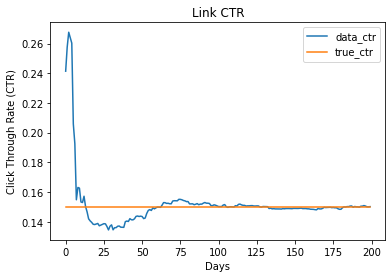

In [148]:
def plot_experiment(plotting_days_n, with_real=True):
    time_series_ctrs = np.cumsum(clicked_nums) / np.cumsum(views)


    plt.plot(time_series_ctrs[:plotting_days_n], label="data_ctr")
    if with_real:
        plt.plot([0.15 for _ in range(plotting_days_n)], label="true_ctr")

    # Labeling stuff, ignore me
    plt.xlabel("Days")
    plt.ylabel("Click Through Rate (CTR)")
    plt.title("Link CTR")
    plt.legend()

plot_experiment(200)

#### As you can see

The click throgh rate from the data needs around 100 or more days until it converges to the true data.
If you have lots of data already, maybe you don't wanna bother with all the Bayesian stuff.
Just plot the above plot like I do, and says that it converges to this number after we use lots of data.

But in case we are just starting out, it can be quite difficult to say how certain we are.
Imagine in case that we are at days = 5, and the stakeholders want to know about how we are doing.

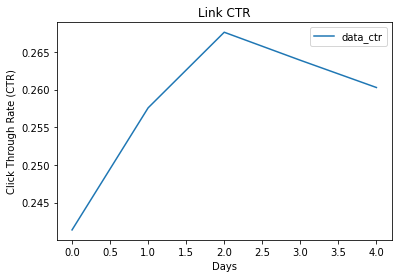

In [151]:
# To mimic a real scenario, I remove the real ctr line out. 
# With just this data, it will be very difficult for you to say about CTR. 
plot_experiment(5, with_real=False)

##### Another problem

What if I know that CTR should be less than %10. In frequentist case, I can't do that easily. 

One way to do this is to "pretend" that we already have observed %10 ctr.

For example, in the first day

1. Real #click is 47 out of 200, ctr = 0.23
2. I pretend to have another n views, with 0.2 * n click.
3. For simplicity, let's say n = 200, fake_click = 20
4. The new ctr is (47 + 20) / (200 + 200) = 0.16


Notice how CTR goes closer to the prior we thought. Bayesian, still prefer a better solution (IMO).

As it allows us to provide prior as a distribution, rather than just one number.

### Bayesian Statistics come to the rescue

(Finally)

Outline
1. Familiarzed ourselves with Bayes Rule.
2. Applying it with our example
3. Result and compare with the frequentist approach.

### Bayes Rules


In [157]:
# Terms

<div>
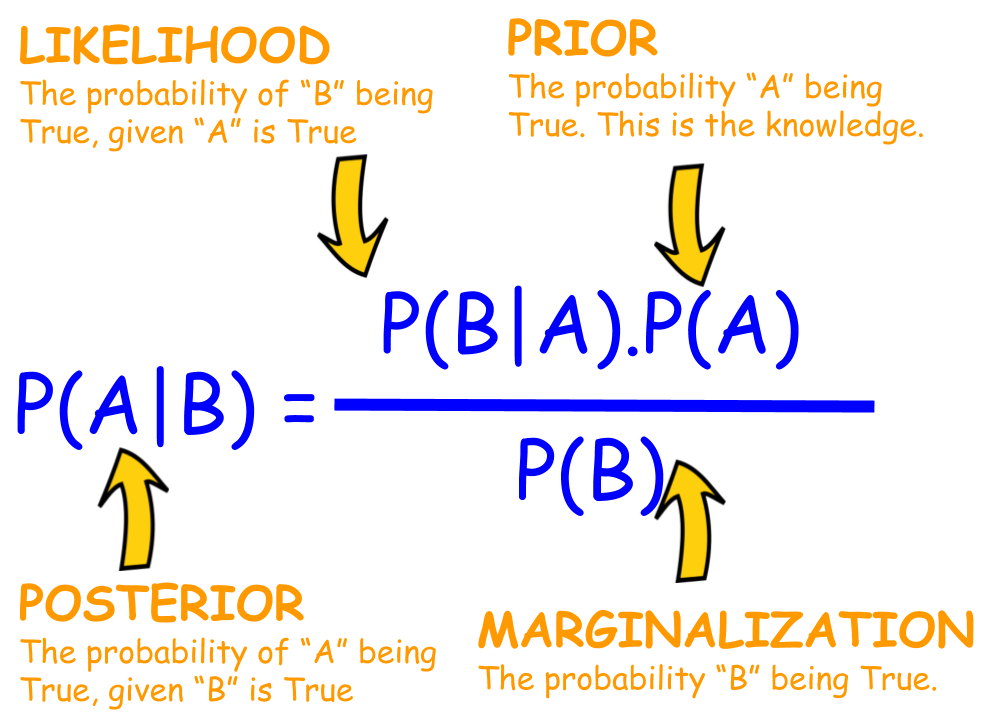
</div>



### Let's apply what each term means in our case


$$P( fact|evidence ) = \frac{P(evidence|fact)*P(fact)}{P(evidence)} $$


Or in our case

$$P( \theta|data ) = \frac{P(data|\theta)*P(\theta)}{P(data)} $$


To explain each term with our example term:

$$P( \theta|data ) = \text{What is the probability that the CTR is }\theta\text{, given that I observe these data}  $$

$$P(data|\theta) = \text{What is likelihood that we observe this set of data, given CTR = }\theta $$

$$P(\theta) = \text{Our prior distribution. What is the probability that }\theta \text{ is this value?} $$

$$P(data) = \text{What is the likelihood that we observe this set of data.} $$

$$ \text{(We sum over all } P(data|\theta) \text{ for } \theta \text{ from 0 to 1)} $$

### To solidfy our understanding, let's calculate each of the term.

What we will do is, for each day, we'll update the P(θ|data) based the data we observe on that data. 

One thing that we can do now is to specify the prior of theta.


In human terms, we can specify what we believe our CTR is into this by setting it in our prior distribution (P(θ))

Let's say we think CTR might be around 0.10, we might model our prior like this:

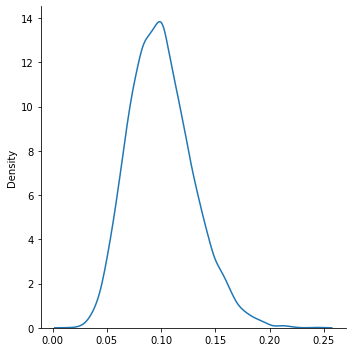

In [181]:
alpha, beta = 10, 90 # Ignore this for now. Just some hyperparametrs to plot the prior distribution. 
n = 10000 # Ignore this

sns.displot(np.random.beta(alpha, beta, n), kind="kde")

#### As you can see

This distribution represents our belief that theta (ctr) is around 0.1
We represent this as Beta(10, 90). Don't worry about what this distribution is. Can use other distribution.
But just that this makes our the math easier. Can treat as absteract for now.

### Let's update Posterior distribution.

1. Let's look at the first day data, then calculate the "Likelihood"

In [186]:
f"Clicked: {clicked_nums[0]}, Views: {views[0]}"

'Clicked: 7, Views: 29'

<IPython.core.display.Javascript object>


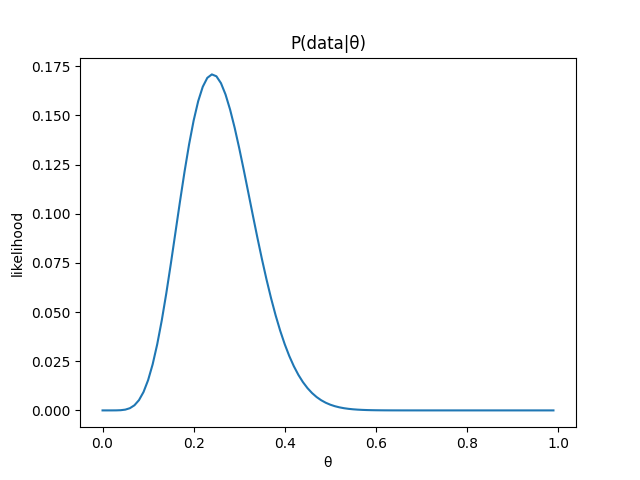

Text(0.5, 1.0, 'P(data|θ)')

In [318]:
## Let's use Binomial Distribution to model our clicks and views.  -> P(data|theta)

# Following binomial formula
def factorial(n, fact=1):
    for num in range(2, n + 1):
        fact *= num
    return fact

def binomial_prob(success, total, prob):
    normalizer = math.comb(total, success)
    return normalizer * (prob**(success)) * ((1 - prob)**(total-success))

plt.plot([i/100 for i in range(100)], [binomial_prob(7, 29, p/100) for p in range(100)])
plt.xlabel("θ")
plt.ylabel("likelihood")
plt.title("P(data|θ)")

Looking at only likelihood, we are most sure at 7/29 = 0.24, which would be the same answer as in frequentist approach.

However, we won't directly use this. We'll combine the result with our prior to get our posterior distribution.


#### Before that, we need P(data), which is just a number. (Think of it as area under the P(data|θ) curve.)

It's late now, and I definitely need more reading to do the proof myself, so just gonna skip all the math stuff. 

Proof later. For now, I'll just use computer to calculate the area under the curve. :|

In [234]:
p_data = sum([binomial_prob(7, 29, p/100) for p in range(100)])

<IPython.core.display.Javascript object>


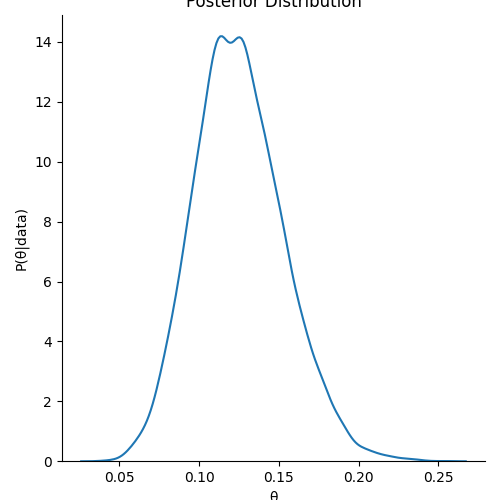

Text(0.5, 1.0, 'Posterior Distribution')

In [321]:
# With P(data|theta)(likelihood) , P(theta) (prior), and P(data) (marginalization)
# Let's update P(theta|data)

# Result is this: 
sns.displot(np.random.beta(7 + 10, 29 + 90, n), kind="kde")
plt.xlabel("θ")
plt.ylabel("P(θ|data)")
plt.title("Posterior Distribution")

# I directly use the math to update the posterior distribution.
# There is some math magic that makes the posterior dist also the binomial distribution.
# So I can just plug in the resulting number. 

<IPython.core.display.Javascript object>


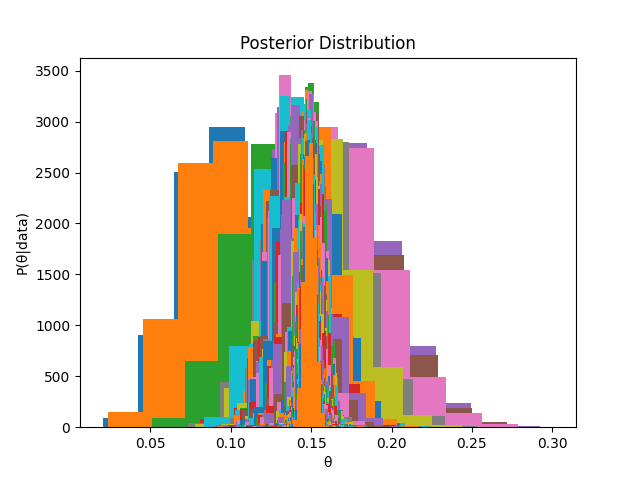

In [334]:
%matplotlib nbagg

# Let's see how the posterior distribution is updated each day.
import matplotlib.animation as animation

line, = ax.plot([])     # A tuple unpacking to unpack the only plot


def animate(i):
    a = sum(clicked_nums[:i])
    b = sum(views[:i]) - a
    plt.hist(np.random.beta(a + 10, b + 90, n))
    plt.xlabel("θ")
    plt.ylabel("P(θ|data)")
    plt.title("Posterior Distribution")

fig = plt.figure()
anim = animation.FuncAnimation(fig, animate, interval = 1, frames=len(clicked_nums))
plt.show()

# TODO: Change to a line later. But as you can see, the distribution gets narrower when we get more data. 